In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
sns.set_style('darkgrid')

In [10]:
def create_sample(mean1,cov1, n_samples=500):
    # Generate samples from each distribution
    samples = np.random.multivariate_normal(mean1, cov1, n_samples)
    return samples 

In [11]:
def create_dataframe(means,convs, n_sample=500):
    data = []
    for index, (mean, conv) in enumerate(zip(means,convs)):
        data.append(create_sample(mean, conv))
    data = np.concatenate(data,axis=0)
    return pd.DataFrame(data={'x':data[:,0],'y':data[:,1],'label':np.array([[f'polar {i}']*n_sample for i in range(1,len(means)+1)]).flatten()})

In [89]:
means1 = [[3.5, 3.5],[-3.5, -3.5]]
convs1 = [np.array([[1, 0.5], [0.5, 1]])*3,np.array([[1, -0.5], [-0.5, 1]])*3]
n_sample1=500

means2 = [[2.5, 2.5],[-1.5, -1.5]]
convs2 = [np.array([[1, -0.5], [-0.5, 1]])*3,np.array([[1, 0.5], [0.5, 1]])*3]
n_sample2=500

In [91]:
df_A = create_dataframe(means1,convs1)
df_B = create_dataframe(means2,convs2)
df_A['count'] = 1
df_B['count'] = 1

In [92]:
candidates = np.array([[4, 3],[-4, -5],[2.5, -2.5]])

<Figure size 700x700 with 0 Axes>

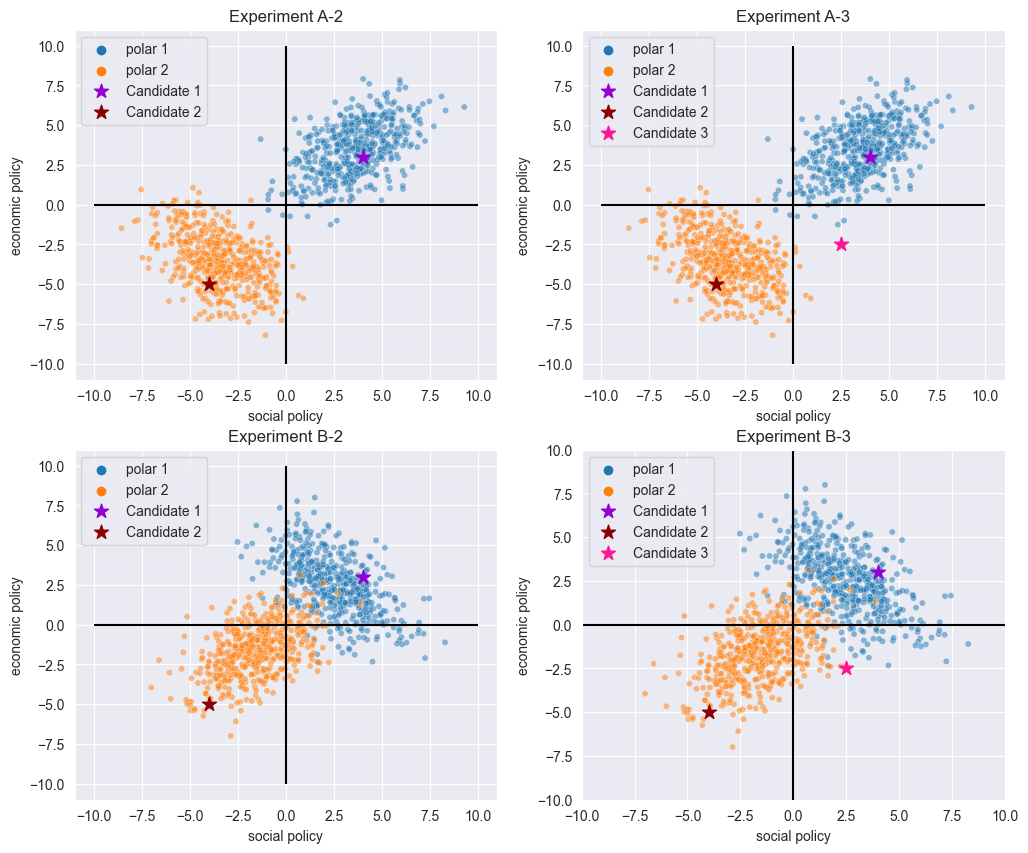

In [94]:
plt.figure(figsize=(7, 7))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# first quadrant
axes[0, 0].hlines(0,10,-10,colors='k')
axes[0, 0].vlines(0,10,-10,colors='k')
sns.scatterplot(df_A,x='x',y='y',hue='label', alpha=0.5, s=20, ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].set_title('Experiment A-2')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend()

# second quadrant
axes[0, 1].hlines(0,10,-10,colors='k')
axes[0, 1].vlines(0,10,-10,colors='k')
sns.scatterplot(df_A,x='x',y='y',hue='label', alpha=0.5, s=20, ax = axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].set_title('Experiment A-3')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend()

# third quadrant
axes[1, 0].hlines(0,10,-10,colors='k')
axes[1, 0].vlines(0,10,-10,colors='k')
sns.scatterplot(df_B,x='x',y='y',hue='label', alpha=0.5, s=20, ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].set_title('Experiment B-2')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend()

# fourth quadrant
axes[1, 1].hlines(0,10,-10,colors='k')
axes[1, 1].vlines(0,10,-10,colors='k')
sns.scatterplot(df_B,x='x',y='y',hue='label', alpha=0.5, s=20, ax = axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].set_title('Experiment B-3')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend()

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()


# first experiment

In [114]:
def get_vote(df,candidates):
    scores = []
    for candidate in candidates:
        vec = df[['x','y']].values-candidate
        scores.append(np.linalg.norm(vec,axis=1))
    votes = np.argmin(np.stack(scores,axis=1),axis=1)+1
    return votes.astype('str')


In [115]:
xx, yy = np.meshgrid(np.arange(-12, 12, 0.1), np.arange(-12, 12, 0.1))
df_boundary = pd.DataFrame(data={'x' : xx.flatten(),
                                 'y' : yy.flatten()})

# Create a colormap and norm based on the levels and colors
cmap2 = ListedColormap(['blue', 'orange'])
cmap3 = ListedColormap(['blue', 'orange', 'green'])

In [116]:
df_A['exp_A2']= get_vote(df_A,candidates[:-1])
df_A['exp_A3']= get_vote(df_A,candidates)
df_B['exp_B2']= get_vote(df_B,candidates[:-1])
df_B['exp_B3']= get_vote(df_B,candidates)
df_boundary['exp_2']= get_vote(df_boundary,candidates[:-1])
df_boundary['exp_3']= get_vote(df_boundary,candidates)

In [117]:
mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2'] = df_A['exp_A2'].map(mapping)
df_A['exp_A3'] = df_A['exp_A3'].map(mapping)
df_B['exp_B2'] = df_B['exp_B2'].map(mapping)
df_B['exp_B3'] = df_B['exp_B3'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

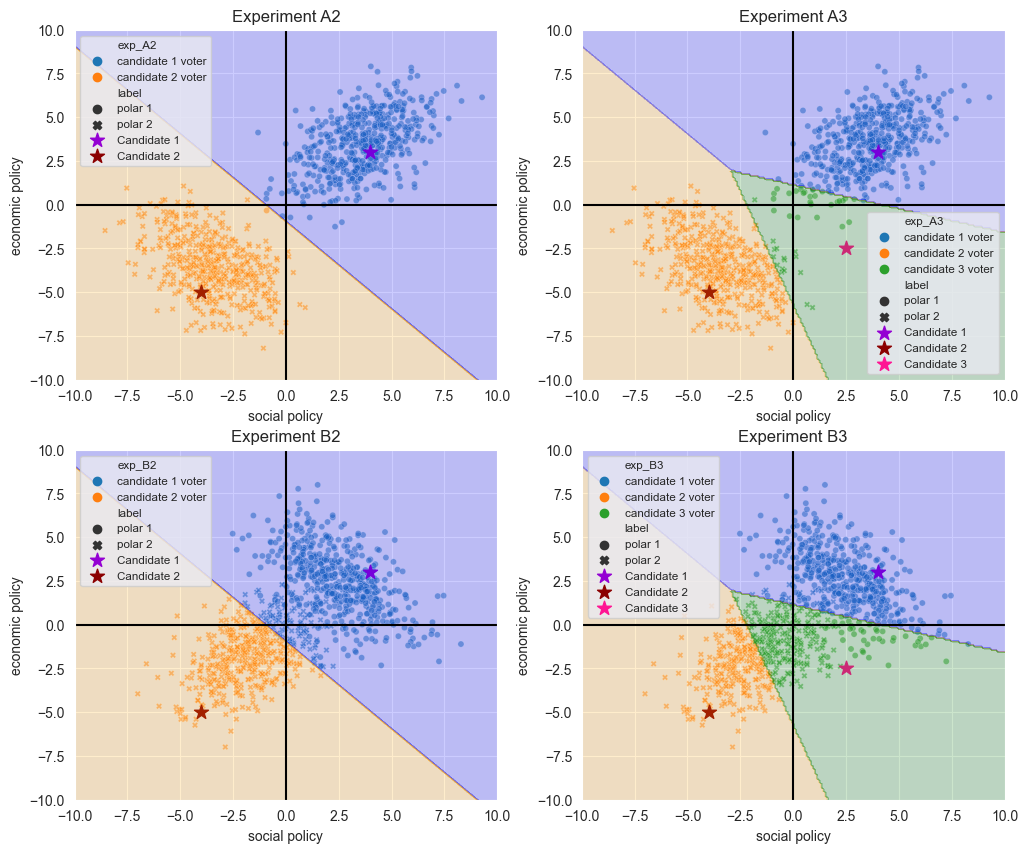

In [132]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2',ascending=True),x='x',y='y',hue='exp_A2', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3',ascending=True),x='x',y='y',hue='exp_A3', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2',ascending=True),x='x',y='y',hue='exp_B2', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3',ascending=True),x='x',y='y',hue='exp_B3', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28472\3970842276.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

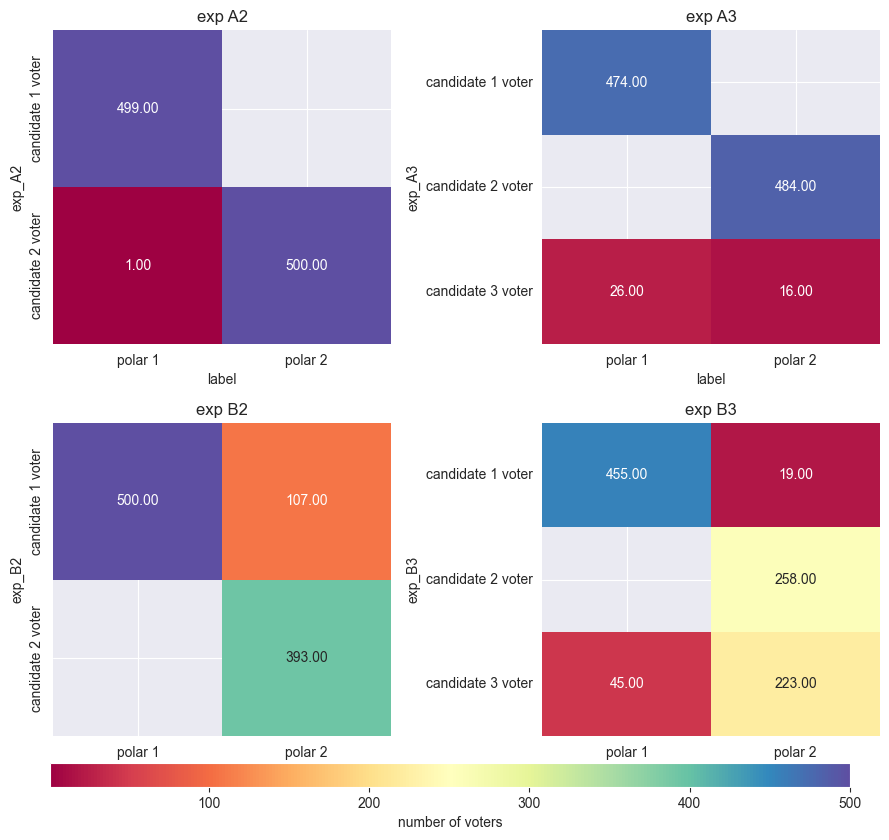

In [169]:
# Define a color map and normalization for a consistent color scale
cmap = 'Spectral'

plt.figure(figsize=(18,18))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot heatmaps on each subplot
sns.heatmap(df_A.pivot_table(values='count',index='exp_A2',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 0], cbar=False, annot=True, fmt='.2f')
axs[0, 0].set_title('exp A2')

sns.heatmap(df_A.pivot_table(values='count',index='exp_A3',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 1], cbar=False, annot=True, fmt='.2f')
axs[0, 1].set_title('exp A3')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B2',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 0], cbar=False, annot=True, fmt='.2f')
axs[1, 0].set_title('exp B2')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B3',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 1], cbar=False, annot=True, fmt='.2f')
axs[1, 1].set_title('exp B3')

# Create a single shared colorbar
# Add an empty subplot to act as a colorbar axis
norm = mcolors.Normalize(vmin=1, vmax=500)
scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# Add the unrelated colorbar
cbar_ax = fig.add_axes([0.055, 0.01, 0.8, 0.03])
plt.colorbar(scalar_mappable, ax=plt.gca(), label='number of voters', cax=cbar_ax, orientation='horizontal')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar

# Show the plot
plt.show()


In [179]:
center = (candidates[0,:]+candidates[1,:])/2
perpendicular_vector = np.array([[0,1],[-1,0]])@(candidates[0,:]-candidates[1,:])
perpendicular_vector = perpendicular_vector.reshape(2,1)
t = np.linspace(-20,20,5).reshape(5,1)
line = perpendicular_vector*t.T+center.reshape(2,1)
line.shape

array([ 8., -8.])

# Model with error term

In [215]:
def get_vote_random(df,candidates, lambda_const=0.5):
    scores = []
    for candidate in candidates:
        vec = df[['x','y']].values-candidate
        score = np.linalg.norm(vec,axis=1)
        std  = np.linalg.norm(vec,axis=1).std()
        random_vec = np.random.normal(loc=0, scale=std, size=len(vec))
        score = score + lambda_const*random_vec
        scores.append(score)
    votes = np.argmin(np.stack(scores,axis=1),axis=1)+1
    return votes.astype('str')


In [216]:
df_A['exp_A2_random']= get_vote_random(df_A,candidates[:-1])
df_A['exp_A3_random']= get_vote_random(df_A,candidates)
df_B['exp_B2_random']= get_vote_random(df_B,candidates[:-1])
df_B['exp_B3_random']= get_vote_random(df_B,candidates)

In [217]:
mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2_random'] = df_A['exp_A2_random'].map(mapping)
df_A['exp_A3_random'] = df_A['exp_A3_random'].map(mapping)
df_B['exp_B2_random'] = df_B['exp_B2_random'].map(mapping)
df_B['exp_B3_random'] = df_B['exp_B3_random'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

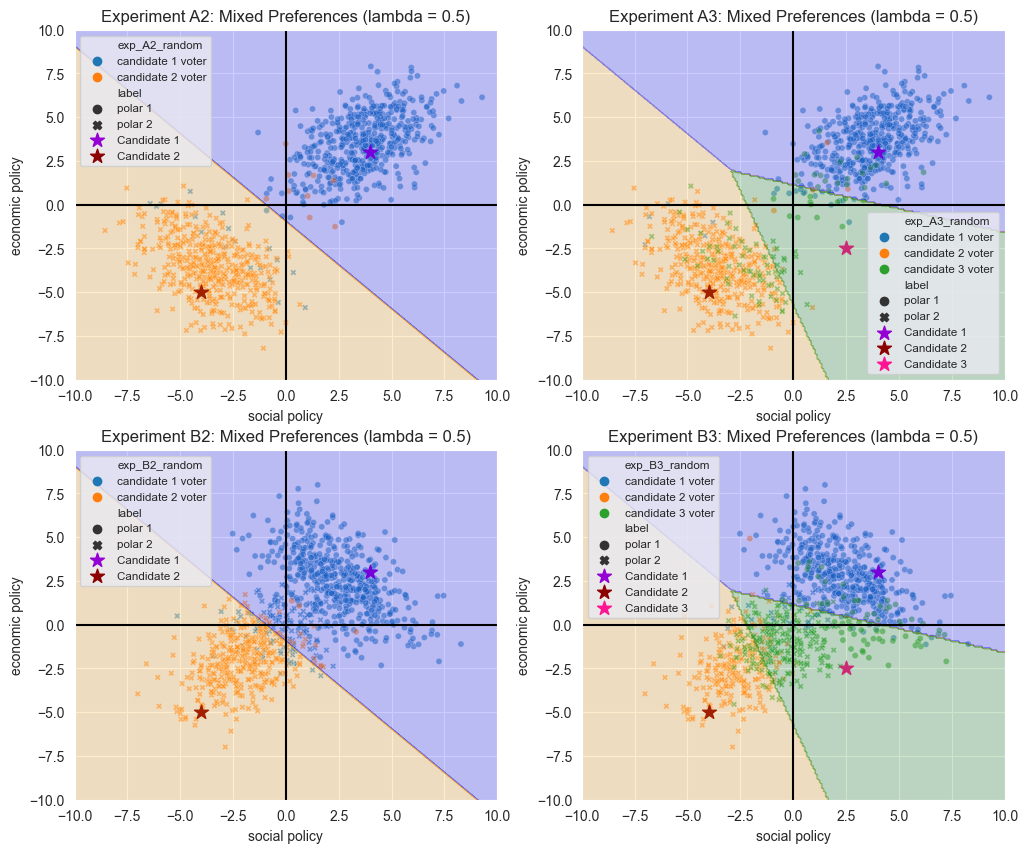

In [223]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2_random',ascending=True),x='x',y='y',hue='exp_A2_random', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2: Mixed Preferences (lambda = 0.5)')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3_random',ascending=True),x='x',y='y',hue='exp_A3_random', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3: Mixed Preferences (lambda = 0.5)')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2_random',ascending=True),x='x',y='y',hue='exp_B2_random', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2: Mixed Preferences (lambda = 0.5)')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3_random',ascending=True),x='x',y='y',hue='exp_B3_random', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3: Mixed Preferences (lambda = 0.5)')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28472\987544047.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

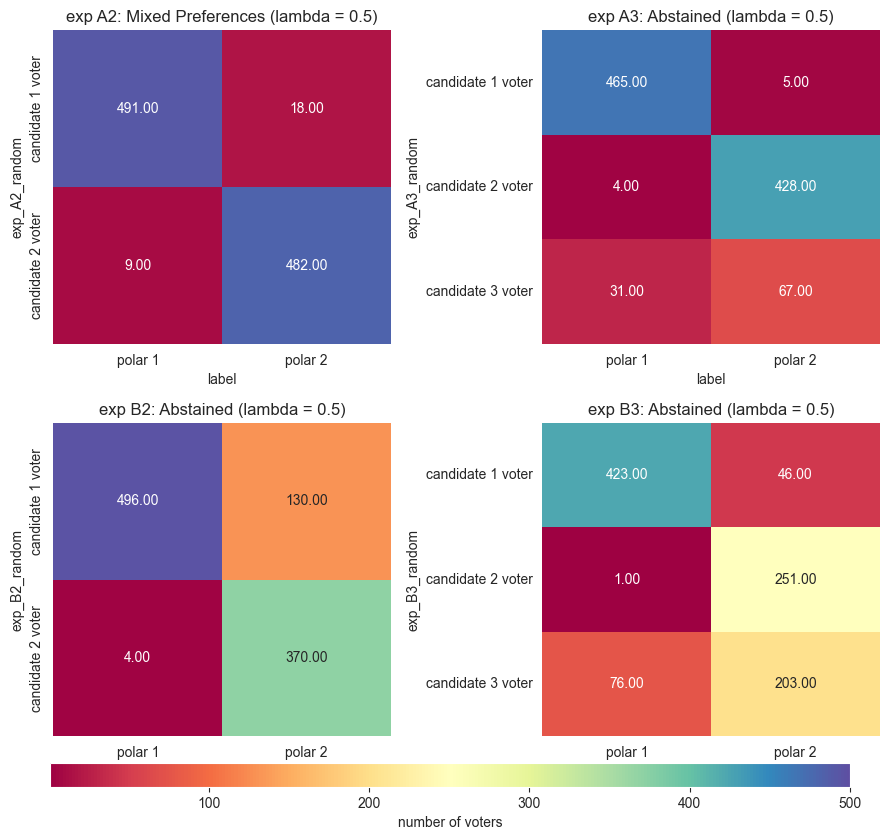

In [224]:
# Define a color map and normalization for a consistent color scale
cmap = 'Spectral'

plt.figure(figsize=(18,18))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot heatmaps on each subplot
sns.heatmap(df_A.pivot_table(values='count',index='exp_A2_random',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 0], cbar=False, annot=True, fmt='.2f')
axs[0, 0].set_title('exp A2: Mixed Preferences (lambda = 0.5)')

sns.heatmap(df_A.pivot_table(values='count',index='exp_A3_random',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 1], cbar=False, annot=True, fmt='.2f')
axs[0, 1].set_title('exp A3: Abstained (lambda = 0.5)')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B2_random',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 0], cbar=False, annot=True, fmt='.2f')
axs[1, 0].set_title('exp B2: Abstained (lambda = 0.5)')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B3_random',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 1], cbar=False, annot=True, fmt='.2f')
axs[1, 1].set_title('exp B3: Abstained (lambda = 0.5)')

# Create a single shared colorbar
# Add an empty subplot to act as a colorbar axis
norm = mcolors.Normalize(vmin=1, vmax=500)
scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# Add the unrelated colorbar
cbar_ax = fig.add_axes([0.055, 0.01, 0.8, 0.03])
plt.colorbar(scalar_mappable, ax=plt.gca(), label='number of voters', cax=cbar_ax, orientation='horizontal')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar

# Show the plot
plt.show()


# abstained voters

In [225]:
def get_vote_abstained(df,candidates, lambda_const=0.5, threshold = 10):
    scores = []
    for candidate in candidates:
        vec = df[['x','y']].values-candidate
        score = np.linalg.norm(vec,axis=1)
        mean = np.linalg.norm(vec,axis=1).mean()
        std  = np.linalg.norm(vec,axis=1).std()
        random_vec = np.random.normal(loc=mean, scale=std, size=len(vec))
        #score = step_function(score, mean+std)
        score = score + lambda_const*random_vec
        scores.append(score)
    votes = np.argmin(np.stack(scores,axis=1),axis=1)+1
    mask = np.min(np.stack(scores,axis=1),axis=1) > threshold
    votes[mask]= 5
    return votes.astype('str')


In [226]:
df_A['exp_A2_abstained']= get_vote_abstained(df_A,candidates[:-1])
df_A['exp_A3_abstained']= get_vote_abstained(df_A,candidates)
df_B['exp_B2_abstained']= get_vote_abstained(df_B,candidates[:-1])
df_B['exp_B3_abstained']= get_vote_abstained(df_B,candidates)

mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2_abstained'] = df_A['exp_A2_abstained'].map(mapping)
df_A['exp_A3_abstained'] = df_A['exp_A3_abstained'].map(mapping)
df_B['exp_B2_abstained'] = df_B['exp_B2_abstained'].map(mapping)
df_B['exp_B3_abstained'] = df_B['exp_B3_abstained'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

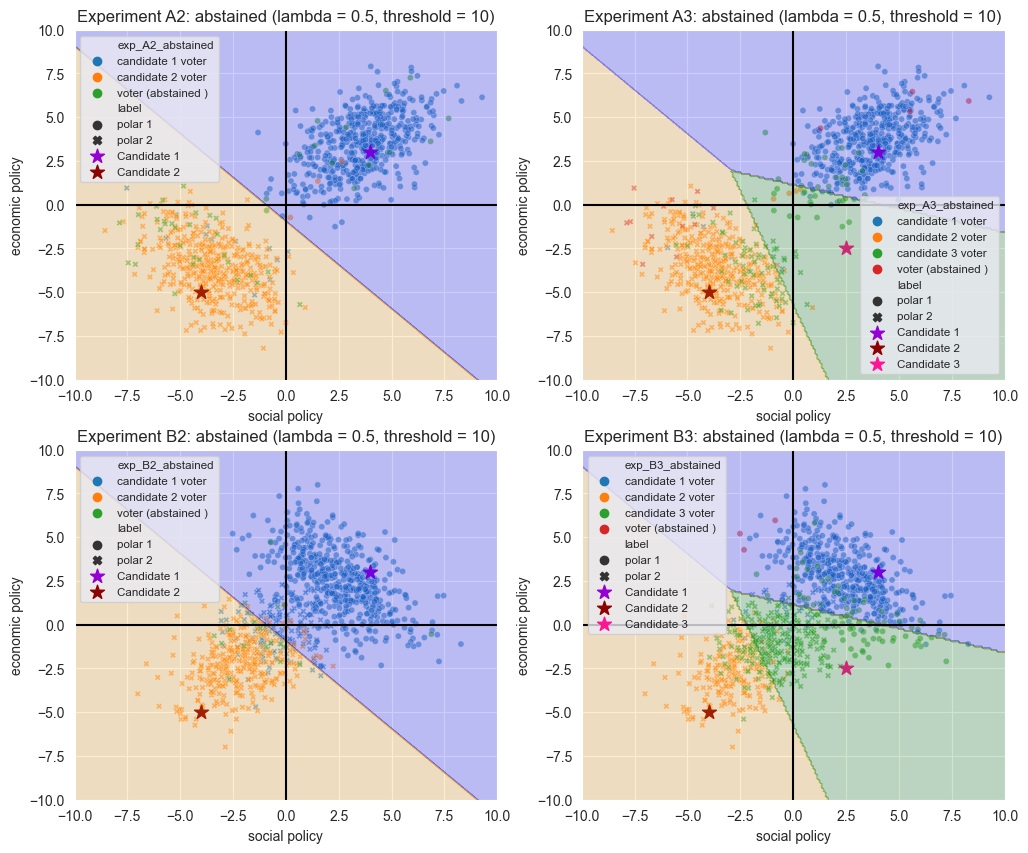

In [228]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2_abstained',ascending=True),x='x',y='y',hue='exp_A2_abstained', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2: abstained (lambda = 0.5, threshold = 10)')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3_abstained',ascending=True),x='x',y='y',hue='exp_A3_abstained', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3: abstained (lambda = 0.5, threshold = 10)')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2_abstained',ascending=True),x='x',y='y',hue='exp_B2_abstained', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2: abstained (lambda = 0.5, threshold = 10)')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3_abstained',ascending=True),x='x',y='y',hue='exp_B3_abstained', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3: abstained (lambda = 0.5, threshold = 10)')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28472\9115083.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

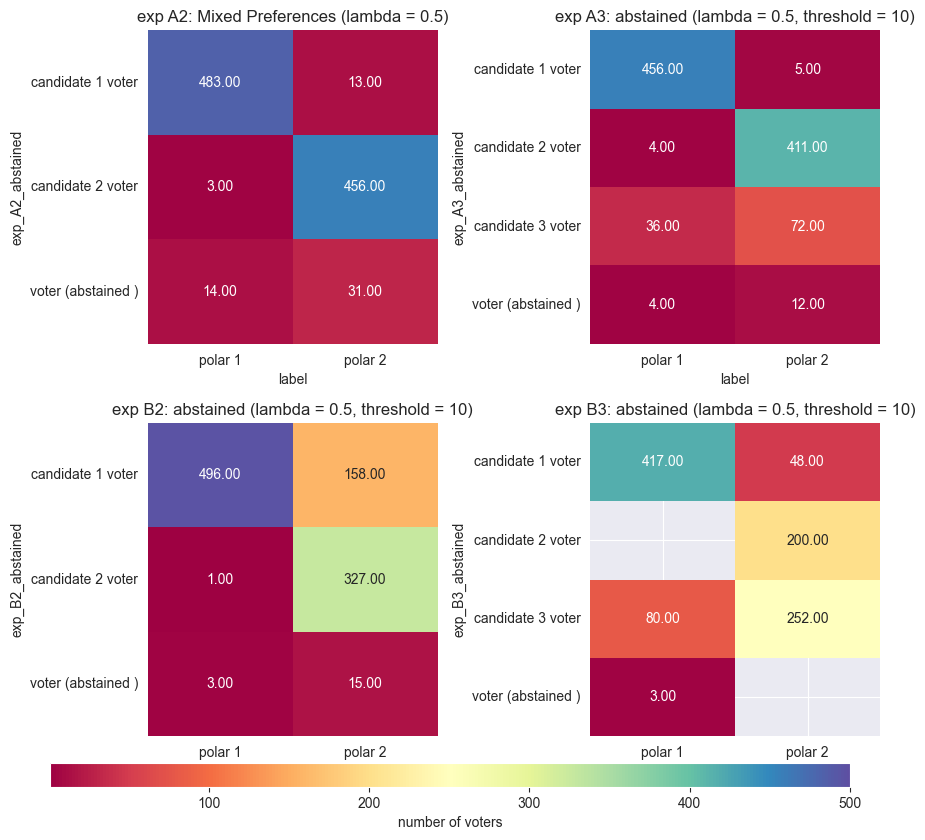

In [229]:
# Define a color map and normalization for a consistent color scale
cmap = 'Spectral'

plt.figure(figsize=(18,18))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot heatmaps on each subplot
sns.heatmap(df_A.pivot_table(values='count',index='exp_A2_abstained',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 0], cbar=False, annot=True, fmt='.2f')
axs[0, 0].set_title('exp A2: Mixed Preferences (lambda = 0.5)')

sns.heatmap(df_A.pivot_table(values='count',index='exp_A3_abstained',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 1], cbar=False, annot=True, fmt='.2f')
axs[0, 1].set_title('exp A3: abstained (lambda = 0.5, threshold = 10)')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B2_abstained',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 0], cbar=False, annot=True, fmt='.2f')
axs[1, 0].set_title('exp B2: abstained (lambda = 0.5, threshold = 10)')

sns.heatmap(df_B.pivot_table(values='count',index='exp_B3_abstained',columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 1], cbar=False, annot=True, fmt='.2f')
axs[1, 1].set_title('exp B3: abstained (lambda = 0.5, threshold = 10)')

# Create a single shared colorbar
# Add an empty subplot to act as a colorbar axis
norm = mcolors.Normalize(vmin=1, vmax=500)
scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# Add the unrelated colorbar
cbar_ax = fig.add_axes([0.055, 0.01, 0.8, 0.03])
plt.colorbar(scalar_mappable, ax=plt.gca(), label='number of voters', cax=cbar_ax, orientation='horizontal')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar

# Show the plot
plt.show()
